# Комп'ютерне моделювання задач прикладної математики

## Динамічні системи. 

###  Лабораторна робота 4 Реакційно-дифузійні системи та їх застосування

***Студентка Пороскун Олена. Група ПМ.м-21***

Варіант 8

*Task 3 Вплив параметра та початкової концентрації.* 

**Постановка задачi**

*Дано*

* Нехай існує два типи речовин А та В.
* Резервуар розміром L x L заповнюють речовинами А та В з концентраціями сА та сВ однорідно.

*Задача*

* Необхідно провести числове моделювання динаміки фазового розшарування однорідного розчину А-В на фази, збагачені на речовину А та речовину В.

**Умова**

$ M = 1, \ \ k = 0.5  \\ $  
* $ a = 0.5, \ \ c_0 = 0.5 \\ $
* $ a = 1,   \ \ c_0 = 0.3 \\ $
* $ a = 1,   \ \ c_0 = 0.5 \\ $
* $ a = 1.5, \ \ c_0 = 0.5 \\ $
* $ a = 1,   \ \ c_0 = 0.7  $

**Р-ня**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
!pip install sympy

In [3]:
from sympy import diff, symbols

In [4]:
import random

Константи та параметри

In [5]:
L = 20
M = 1
k = 0.5
arr_a  = [0.5, 1.0, 1.0, 1.5, 1.0]
arr_c0 = [0.5, 0.3, 0.5, 0.5, 0.7]
print(' L =', L,' M =', M,'\t k =', k, '\n a  =', arr_a, '\n c0 =',arr_c0)

 L = 20  M = 1 	 k = 0.5 
 a  = [0.5, 1.0, 1.0, 1.5, 1.0] 
 c0 = [0.5, 0.3, 0.5, 0.5, 0.7]


In [6]:
a, c = symbols('a c')
f = (c**2)*((1-a*c)**2)
print('Функція f(c,a):')
f

Функція f(c,a):


c**2*(-a*c + 1)**2

In [7]:
#c = symbols('c')
f = (c**2)*((1-a*c)**2)
df1_symbol = diff(f, c) # 1 похідна
print("Перша похідна від f(c,a) по с -> df1(c,a):")
df1_symbol

Перша похідна від f(c,a) по с -> df1(c,a):


-2*a*c**2*(-a*c + 1) + 2*c*(-a*c + 1)**2

In [8]:
print("Друга похідна від f(c,a) по с -> df2(c,a) (оператор Лапласа):" )
op_laplas_symbol = diff(f, c, 2) # 2 похідна = оператор Лапласа
op_laplas_symbol   

Друга похідна від f(c,a) по с -> df2(c,a) (оператор Лапласа):


2*(a**2*c**2 + 4*a*c*(a*c - 1) + (a*c - 1)**2)

In [9]:
# df1 = -2*a*(c**2)*(-a*c+1) + 2*c*(-a*c+1)**2       # 1 похідна
# df2 = 2*(a**2 * c**2 + 4*a*c*(a*c-1) + (a*c-1)**2) # 2 похідна 
# op_laplas = df2                                    # 2 похідна = оператор Лапласа

Функції ініціалізації даних початкової концентрації значеннями близькими до $с_0$.

In [10]:
def fun_init_data(L, c0):
    print('Резервуар розміром LxL, де L =', L)
    print('Початкова концентрація близька до значення c0 =', c0)
    data = np.linspace(c0-0.05, c0+0.05, L*L)
    len_data = len(data)
    new_size = int(np.sqrt(len_data))
    data_resize = np.resize(data, (new_size, new_size))
    return data_resize


def fun_init_data2(L, c0):
    print('Резервуар розміром LxL, де L =', L)
    print('Початкова концентрація близька до значення c0 =', c0)
    data = []
    a1, b1 = c0-0.05, c0+0.05
    for i in range(L*L):
        ab0 = random.random()
        ab1 = ab0*(b1-a1) + a1
        data.append(ab1)
    len_data = len(data)
    new_size = int(np.sqrt(len_data))
    data_resize = np.resize(data, (new_size, new_size))
    return data_resize

Побудова графіку двумірних даних концентрації.

In [11]:
def plot_map(data):
    # графік з вертикальною (за замовчуванням) панеллю кольорів
    fig, ax = plt.subplots()
    cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
    ax.set_title('Карта концентрації речовини ')
    cbar = fig.colorbar(cax)
    plt.show()

Отже, ініціалізуємо початкові дані та зобразимо їх.

In [12]:
c0 = arr_c0[0]

Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5


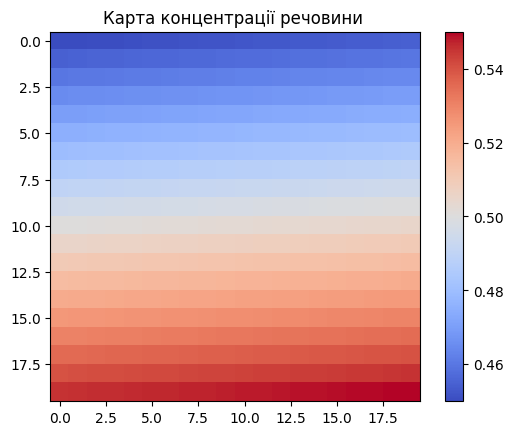

In [13]:
c_init_2D = fun_init_data(L, c0)
plot_map(c_init_2D)

Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5


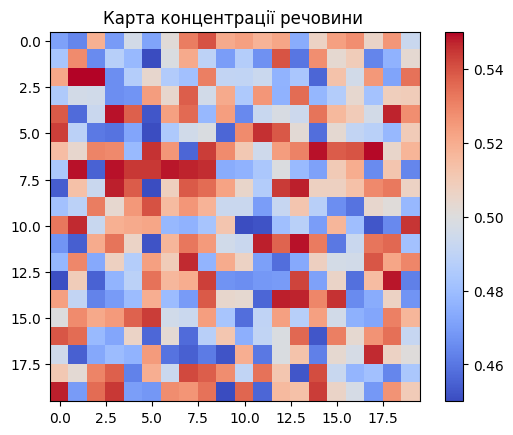

In [14]:
c_init_2D_ = fun_init_data2(L, c0)
plot_map(c_init_2D_)

In [15]:
from scipy.integrate import odeint

Функція, що змінює розмірність даних (робить двумірні дані з одномірних даних, наприклад був масив 100х1 стане 10х10):

In [16]:
def plot_resize_data(data):
    len_data = len(data)
    new_size = int(np.sqrt(len_data))
    newdata = np.resize(data, (new_size, new_size))
    plot_map(newdata)
    return newdata

Функція, що повертає останній елемент масиву:

In [17]:
def fun_last_el(array):
    #print('fun_last_el')
    end = len(array)
    return array[end-1]

Функція, що здійснює інтегрування з використанням початкової точки $state0$ за формулою:
$$
\frac{dc}{dt} = M \nabla^2 [ \frac{df}{dc}-k \nabla^2 c ] , \\
де\ \nabla^2 - оператор\ Лапласа\ (друга\ похідна\ від f(c))
$$

In [18]:
# df1 = -2*a*(c**2)*(-a*c+1) + 2*c*(-a*c+1)**2       # 1 похідна
# df2 = 2*(a**2 * c**2 + 4*a*c*(a*c-1) + (a*c-1)**2) # 2 похідна 
# op_laplas = df2                                    # 2 похідна = оператор Лапласа

In [19]:
def fun_31(a = 0.5, state0=0.5):
    # процес інтегрування f(c) = c**2 * (1-a*c) за формулою
    # dc/dt = M*op_laplas*((df/dc) - k*op_laplas*c)
    def dcdt(state, t):
        c = state                                               # Розпаковка вектору
        return M*op_laplas(c)*(df1(c) - k*op_laplas(c)*c) # Похідні
    
    def df1(c):
        #df1 = df/dc 
        ans1 = -2*a*(c**2)*(-a*c+1) + 2*c*(-a*c+1)**2
        # c**2*(2*c-2) + 2*c*(1-c)**2 
        return ans1 
        
    def op_laplas(c):
        #df1 = df/dc
        #op_laplas = d(df1)/dc - оператор Лапласа
        ans2 = 2*(a**2 * c**2 + 4*a*c*(a*c-1) + (a*c-1)**2)
        #2*c**2 - 8*c*(1-c) + 2*(1-c)**2 
        return ans2
    
    t = np.arange(0.0, 40.0, 0.1)
    states = odeint(dcdt, state0, t)  
    states = np.round(states, 4)
    
    last_states = fun_last_el(states)
    
    #print('a =', a, '\t c0 =', state0, '\t c =', last_states)
    #print('Процес інтегрування')
    
    return last_states

In [20]:
def fun_initial_array(L, arr_c0):
    print('1 спосіб задання початквоих значень')
    c_init_2D = []
    for i in range(len(arr_c0)):
        c_init_2D.append(fun_init_data(L, c0=arr_c0[i]))   
        #plot_map(c_init_2D[i])
    print(np.shape(c_init_2D))
    return c_init_2D

def fun_initial_array2(L, arr_c0):
    print('\n 2 спосіб задання початквоих значень')
    c_init_2D = []
    for i in range(len(arr_c0)): 
        c_init_2D.append(fun_init_data2(L, c0=arr_c0[i]))
        #plot_map(c_init_2D[i])
    print(np.shape(c_init_2D))
    return c_init_2D

In [21]:
c1_init_2D = fun_initial_array(L, arr_c0)
c2_init_2D = fun_initial_array2(L, arr_c0)

1 спосіб задання початквоих значень
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.3
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.7
(5, 20, 20)

 2 спосіб задання початквоих значень
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.3
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.5
Резервуар розміром LxL, де L = 20
Початкова концентрація близька до значення c0 = 0.7
(5, 20, 20)


Функція, яка показує початкову концентрацію та кінцеву (для масивів):

In [22]:
def integr_and_plot(L=20, arr_a=[0.5], arr_c0=[0.5]):
    c_init_2D = []
    c_init_2D = fun_initial_array2(L, arr_c0)
    
    c_1D = []
    for n in range(len(arr_c0)):
        # початкова концентрація
        c_init_1D = np.resize(c_init_2D[n], L*L)
        print('окіл точки с0 =',arr_c0[n], '\t ( a =',arr_a[n],')')
        # після інтегрування в околі точки с0
        cc =[ fun_31(a = arr_a[n], state0 = ci0) for ci0 in c_init_1D ]
        c_1D.append(cc) 
        
    for n in range(len(arr_c0)):
        # початкова концентрація
        plot_map(c_init_2D[n])                            

        # після інтегрування в околі точки с0
        c1_2D = plot_resize_data(c_1D[n])
        
    return c_1D

In [23]:
#c1_1D = integr_and_plot(L, arr_a, arr_c0)

Функція, яка показує початкову концентрацію та кінцеву (для одного ел. з масиву):

In [24]:
def integr_and_plot_new(L=20, arr_a=[0.5], arr_c0=[0.5], c_init_2D=[]):
    c_1D = []
    for n in range(len(arr_c0)):
        # початкова концентрація
        c_init_1D = np.resize(c_init_2D[n], L*L)
        print('окіл точки с0 =',arr_c0[n], '\t ( a =',arr_a[n],')')
        # після інтегрування в околі точки с0
        cc =[ fun_31(a = arr_a[n], state0 = ci0) for ci0 in c_init_1D ]
        c_1D.append(cc) 
    
    # початкова концентрація
    plot_map(c_init_2D[0]) 

    # після інтегрування в околі точки с0
    c1_2D = plot_resize_data(c_1D[0])
        
    return c_1D

окіл точки с0 = 0.5 	 ( a = 0.5 )


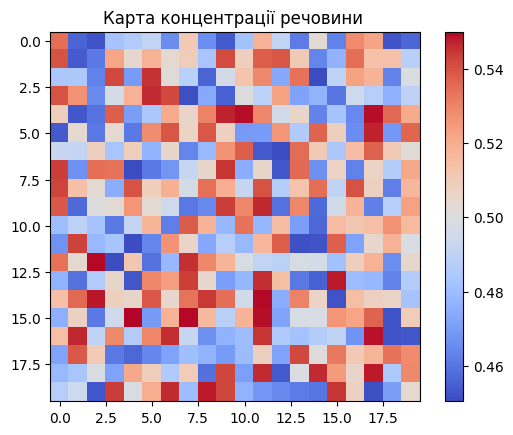

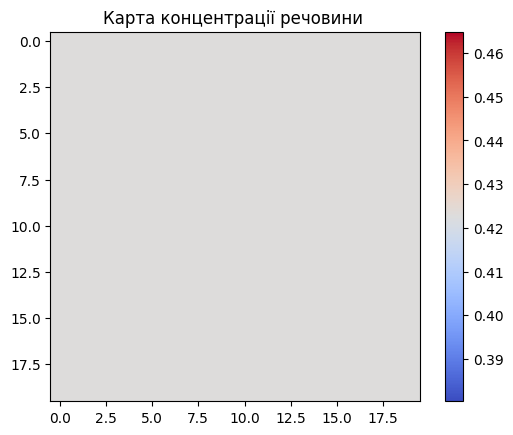

In [25]:
k=0
c_1D_new = integr_and_plot_new(L, [arr_a[k]], [arr_c0[k]], [c2_init_2D[k]])

окіл точки с0 = 0.3 	 ( a = 1.0 )


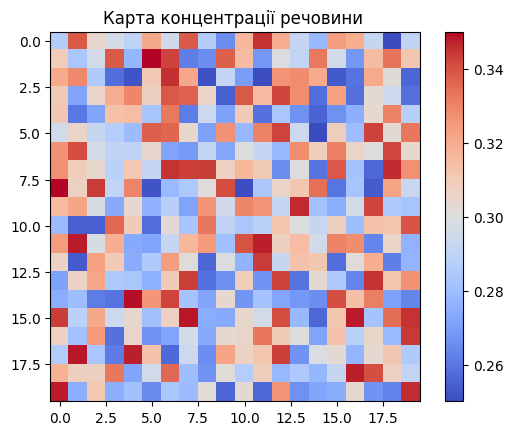

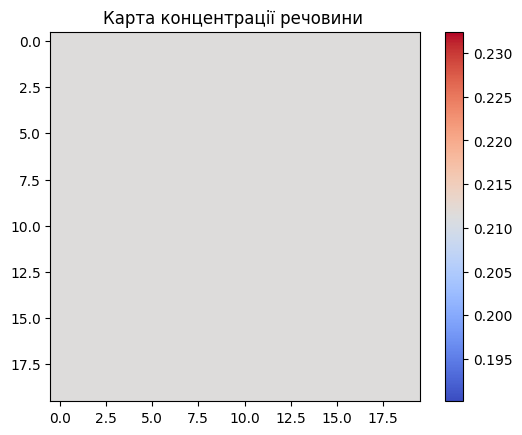

In [26]:
k=1
c_1D_new = integr_and_plot_new(L, [arr_a[k]], [arr_c0[k]], [c2_init_2D[k]])

окіл точки с0 = 0.5 	 ( a = 1.0 )


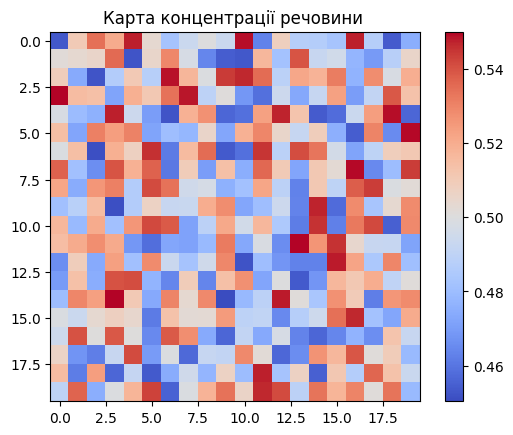

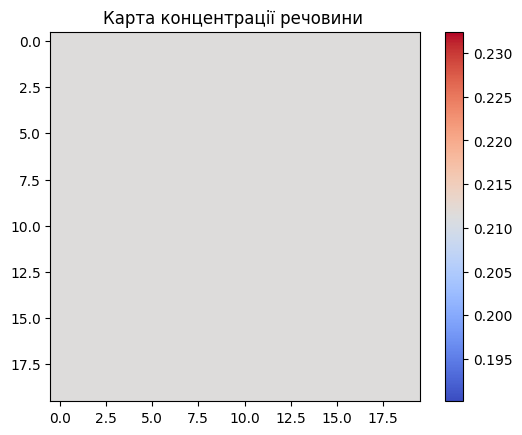

In [27]:
k=2
c_1D_new = integr_and_plot_new(L, [arr_a[k]], [arr_c0[k]], [c2_init_2D[k]])

окіл точки с0 = 0.5 	 ( a = 1.5 )


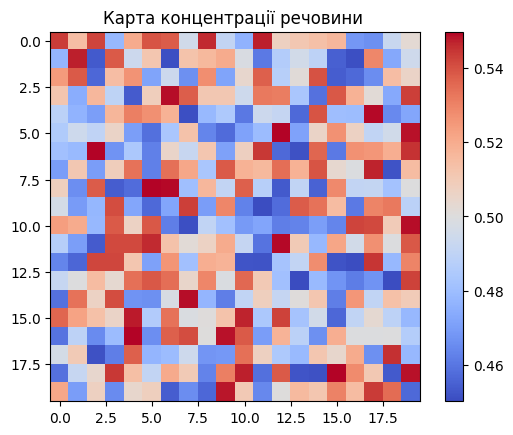

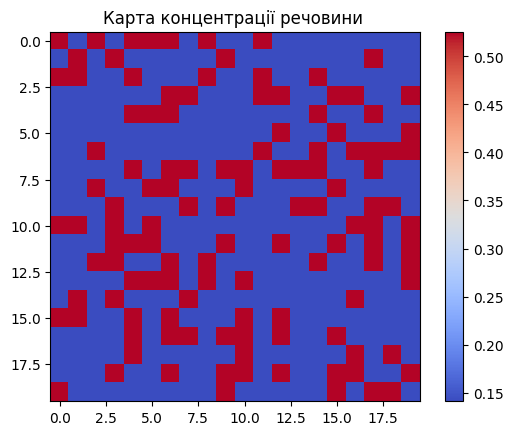

In [31]:
k=3
c_1D_new = integr_and_plot_new(L, [arr_a[k]], [arr_c0[k]], [c2_init_2D[k]])

окіл точки с0 = 0.7 	 ( a = 1.0 )


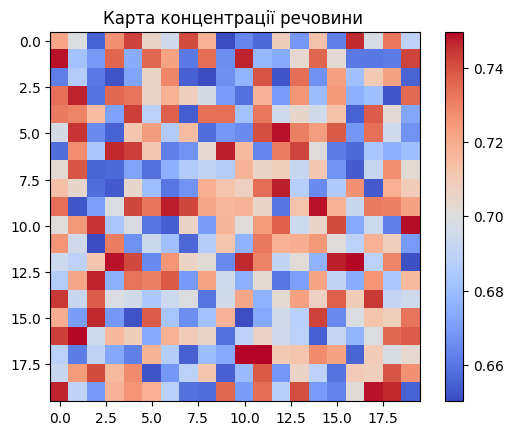

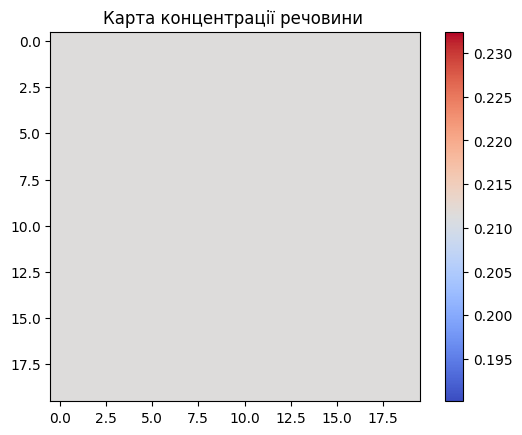

In [32]:
k=4
c_1D_new = integr_and_plot_new(L, [arr_a[k]], [arr_c0[k]], [c2_init_2D[k]])